In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-sales-data/Details.csv
/kaggle/input/online-sales-data/Orders.csv


In [2]:
# reading the datasets
details_df = pd.read_csv("/kaggle/input/online-sales-data/Details.csv")
orders_df = pd.read_csv("/kaggle/input/online-sales-data/Orders.csv")

# Diplaying the first rows of the details dataset

In [14]:
details_df.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
0,B-25681,1096,658,7,Electronics,Electronic Games,COD
1,B-26055,5729,64,14,Furniture,Chairs,EMI
2,B-25955,2927,146,8,Furniture,Bookcases,EMI
3,B-26093,2847,712,8,Electronics,Printers,Credit Card
4,B-25602,2617,1151,4,Electronics,Phones,Credit Card


# Diplaying the first rows of the orders dataset

In [15]:
orders_df.head()

,Order ID,Order Date,CustomerName,State,City,Year,Month
0,B-26055,2018-10-03,Harivansh,Uttar Pradesh,Mathura,2018,10
1,B-25993,2018-03-02,Madhav,Delhi,Delhi,2018,3
2,B-25973,2018-01-24,Madan Mohan,Uttar Pradesh,Mathura,2018,1
3,B-25923,2018-12-27,Gopal,Maharashtra,Mumbai,2018,12
4,B-25757,2018-08-21,Vishakha,Madhya Pradesh,Indore,2018,8


# Exploring the datasets

In [5]:
# Details Dataset
print(details_df.info())
print(details_df.describe())

# Orders Dataset
print(orders_df.info())
print(orders_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      1500 non-null   object
 1   Amount        1500 non-null   int64 
 2   Profit        1500 non-null   int64 
 3   Quantity      1500 non-null   int64 
 4   Category      1500 non-null   object
 5   Sub-Category  1500 non-null   object
 6   PaymentMode   1500 non-null   object
dtypes: int64(3), object(4)
memory usage: 82.2+ KB
None
            Amount      Profit     Quantity
count  1500.000000  1500.00000  1500.000000
mean    291.847333    24.64200     3.743333
std     461.924620   168.55881     2.184942
min       4.000000 -1981.00000     1.000000
25%      47.750000   -12.00000     2.000000
50%     122.000000     8.00000     3.000000
75%     326.250000    38.00000     5.000000
max    5729.000000  1864.00000    14.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0

In [6]:
print(details_df.isnull().sum())
print(orders_df.isnull().sum())

Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
PaymentMode     0
dtype: int64
Order ID        0
Order Date      0
CustomerName    0
State           0
City            0
dtype: int64


### The two datasets have non null values

# Converting the Order Date column to Date type

In [7]:
# Converting the Order Date column to Date type
orders_df["Order Date"] = pd.to_datetime(orders_df["Order Date"],format="mixed")
orders_df["Year"] = orders_df["Order Date"].dt.year
orders_df["Month"] = orders_df["Order Date"].dt.month
orders_df.head()

,Order ID,Order Date,CustomerName,State,City,Year,Month
0,B-26055,2018-10-03,Harivansh,Uttar Pradesh,Mathura,2018,10
1,B-25993,2018-03-02,Madhav,Delhi,Delhi,2018,3
2,B-25973,2018-01-24,Madan Mohan,Uttar Pradesh,Mathura,2018,1
3,B-25923,2018-12-27,Gopal,Maharashtra,Mumbai,2018,12
4,B-25757,2018-08-21,Vishakha,Madhya Pradesh,Indore,2018,8


In [8]:
# Merge datasets on 'Order ID'
merged_df = pd.merge(details_df, orders_df, on='Order ID', how='inner')

# Display the merged dataset to inspect the results
merged_df.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City,Year,Month
0,B-25681,1096,658,7,Electronics,Electronic Games,COD,2018-04-06,Bhawna,Madhya Pradesh,Indore,2018,4
1,B-25681,1625,-77,3,Electronics,Phones,EMI,2018-04-06,Bhawna,Madhya Pradesh,Indore,2018,4
2,B-25681,523,204,7,Clothing,Trousers,COD,2018-04-06,Bhawna,Madhya Pradesh,Indore,2018,4
3,B-25681,44,-3,1,Clothing,Saree,Debit Card,2018-04-06,Bhawna,Madhya Pradesh,Indore,2018,4
4,B-25681,243,-14,2,Furniture,Chairs,COD,2018-04-06,Bhawna,Madhya Pradesh,Indore,2018,4


# What are most sold category of products?

In [28]:
# Sales by Category
category_sales = merged_df.groupby('Category')['Amount'].sum().reset_index()
print(category_sales)


      Category  Amount
0     Clothing  144323
1  Electronics  166267
2    Furniture  127181


# Visualizing the sales by category

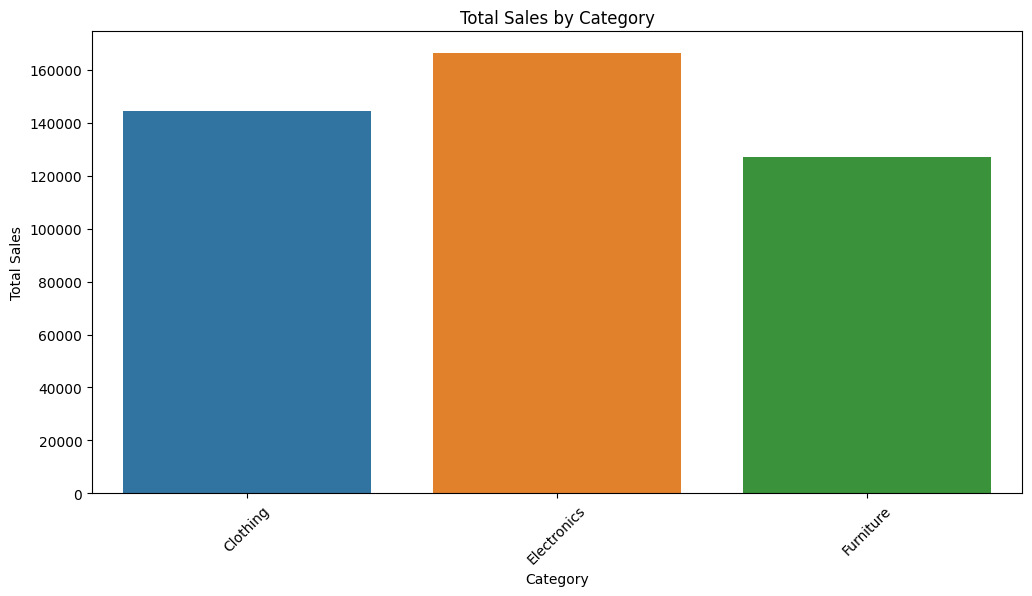

In [10]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Amount', data=category_sales)
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

### Observation : The Electronics Category is the most sold category followed by Clothing.

# What are the most sold products in Electronics?

In [37]:
electronics_df = merged_df[merged_df["Category"]=="Electronics"]
subcategory_sales = electronics_df.groupby("Sub-Category")["Amount"].sum().reset_index()
most_sold_products = subcategory_sales.sort_values(by="Amount",ascending=False)

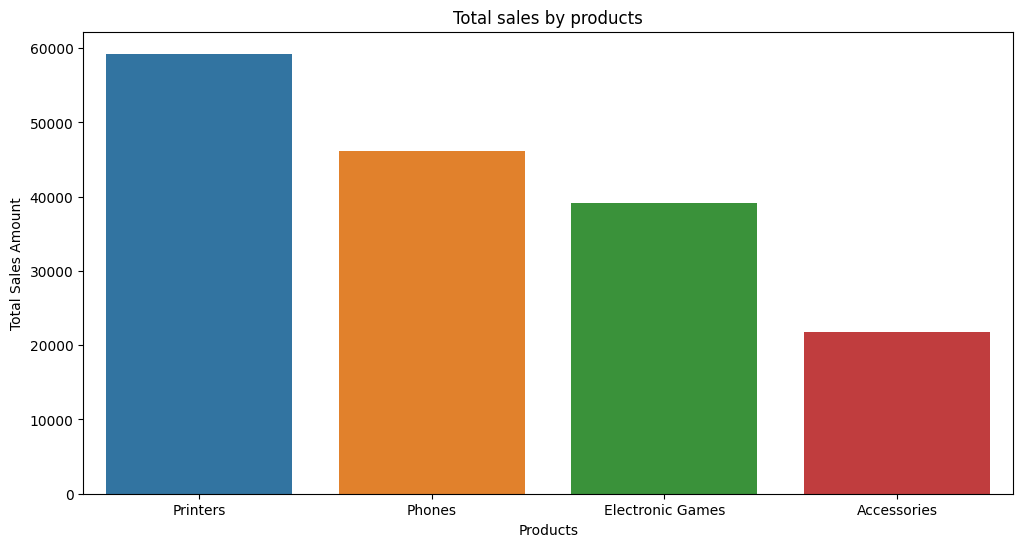

In [38]:
plt.figure(figsize=(12,6))
sns.barplot(x="Sub-Category",y="Amount",data=most_sold_products)
plt.title("Total sales by products")
plt.xlabel("Products")
plt.ylabel("Total Sales Amount")
plt.show()

### Observation : Printers are the most sold Products in Electronics.

# What are the cities and states that have the most sales?

In [11]:
# Sales by City
city_sales = merged_df.groupby('City')['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False)

# Sales by State
state_sales = merged_df.groupby('State')['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False)


# Visualizing sales by city and state

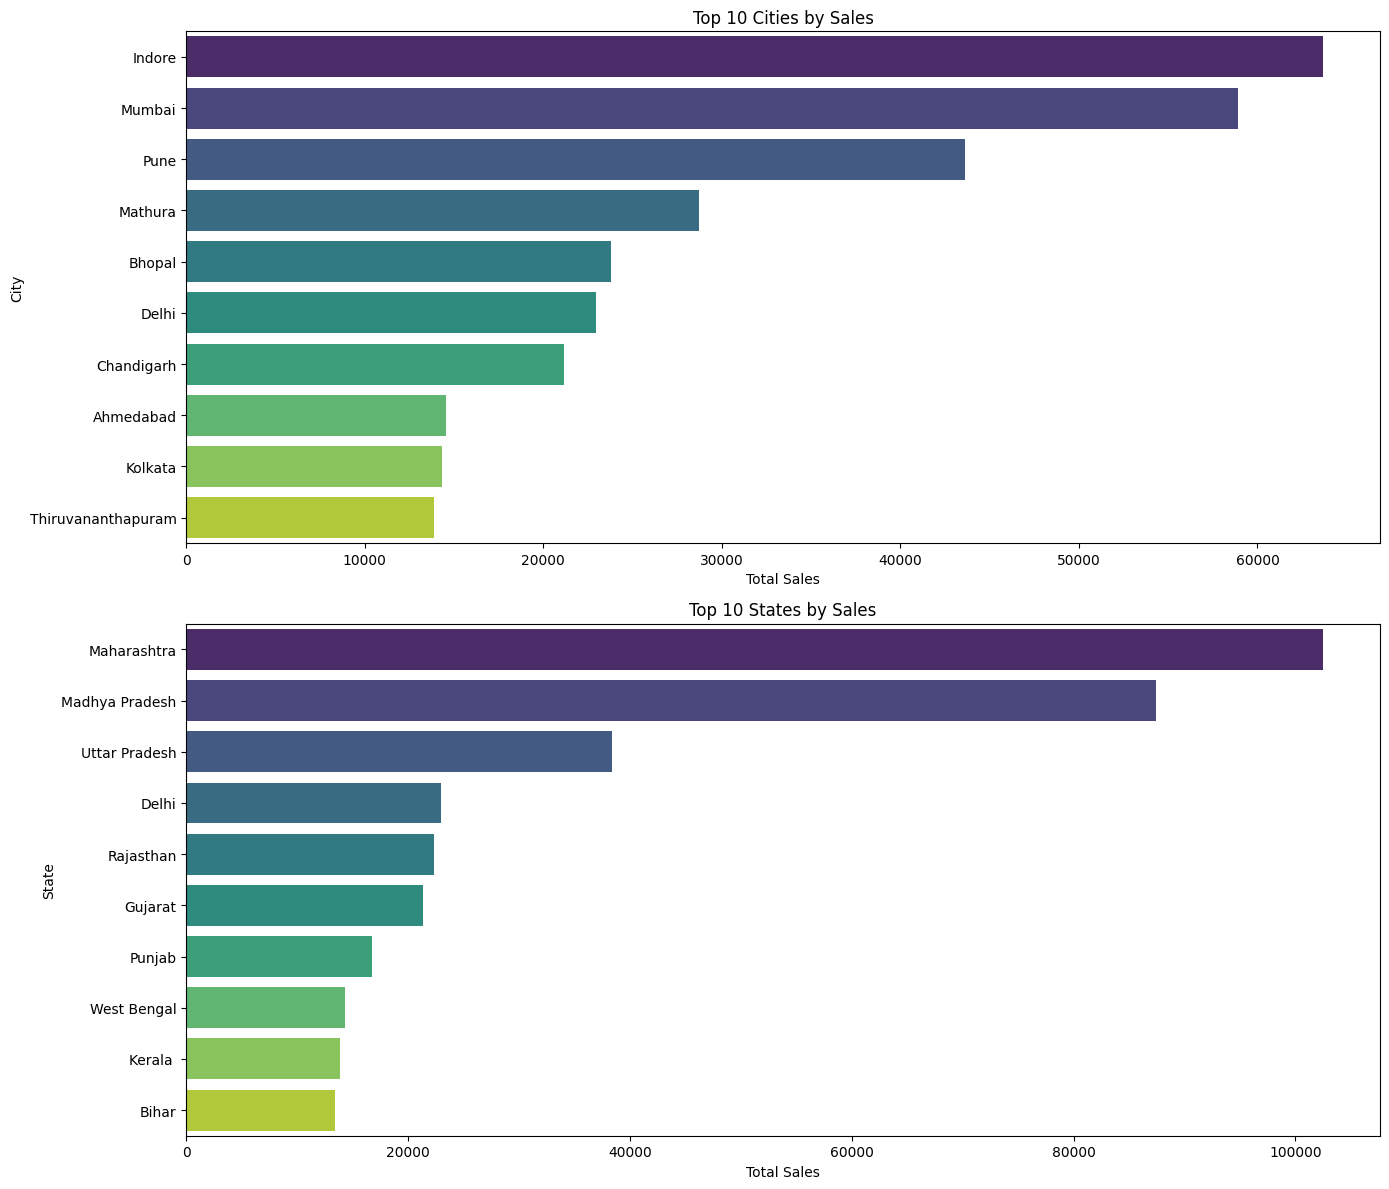

In [12]:
# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 12))

# Bar chart for Sales by City
sns.barplot(x='Amount', y='City', data=city_sales.head(10), ax=axes[0], palette='viridis')
axes[0].set_title('Top 10 Cities by Sales')
axes[0].set_xlabel('Total Sales')
axes[0].set_ylabel('City')

# Bar chart for Sales by State
sns.barplot(x='Amount', y='State', data=state_sales.head(10), ax=axes[1], palette='viridis')
axes[1].set_title('Top 10 States by Sales')
axes[1].set_xlabel('Total Sales')
axes[1].set_ylabel('State')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

### Observation : The graphs demonstrates that the states of "Maharashtra" and "Madhya Pradesh" are the most profitable states for the company, also the cities of "Indore" and "Mumbai" have the most sales compared to the other cities in India.

# What are the Months that have the most sales?

In [39]:
monthly_sales = merged_df.groupby("Month")["Amount"].sum().reset_index().sort_values(by="Amount",ascending=False)

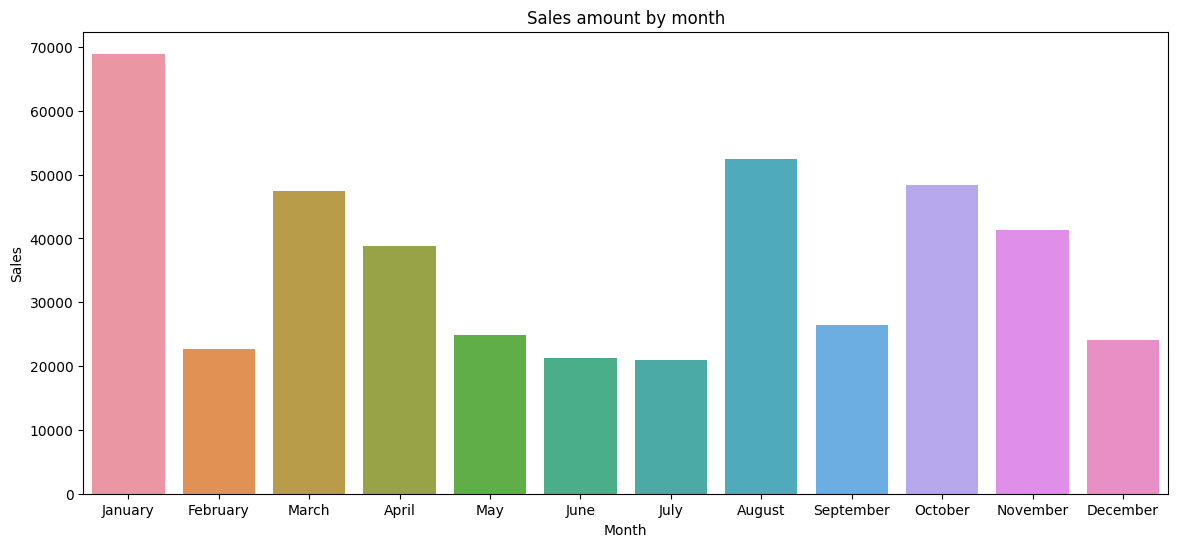

In [40]:
plt.figure(figsize=(14, 6))
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sns.barplot(x="Month",y="Amount",data = monthly_sales)
plt.title("Sales amount by month")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.xticks(ticks=range(12),labels=month_names)
plt.show()

### Observation : January is the month to have the most sales, followed by August and October.